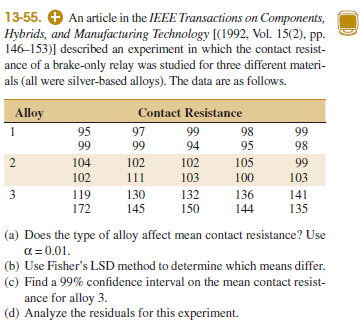

In [5]:
from DOE import Anova_NoBlock, Anova_Block
from scipy import stats

In [7]:
Data_nb = Anova_NoBlock("opdrachten.xlsx", 0.01, 10, 3)
df, df_melt, names, means = Data_nb.import_df("13.55")


,1,2,3
1,95,104,119
2,97,102,130
3,99,102,192
4,98,105,136
5,99,99,141
6,99,102,172
7,99,111,145
8,94,103,150
9,95,100,144
10,98,103,135


# Boxplot

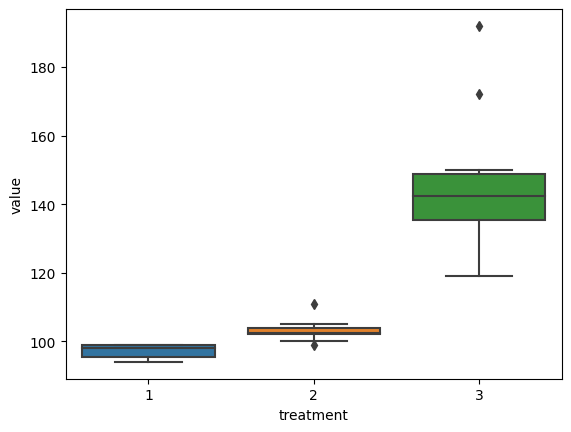

In [9]:
Data_nb.boxplot()

In dit boxplot is een eerste indruk opgewekt over de afhankelijkheid van de treatments. Hierin is te zien dat het lijkt alsof de derde treatment significant anders is ten opzichte van de anderen.

# Anova analyse zonder blokken

Stel nulhypothese:

H0: Er bestaat geen significant verschil tussen de treatments.

oftewel
$$ \mu_1 = \mu_2 = \mu_3 = \mu$$

In [8]:
df_melt, anova_nb, pvalue_nb, lsd_nb = Data_nb.anova()
anova_nb

H0 rejected
1-2: no significant difference 
1-3: SIGNIFICANT DIFFERENCE!
2-3: SIGNIFICANT DIFFERENCE!


,sum_sq,df,F,PR(>F)
treatment,14397.8,2.0,46.573609,1.767159e-09
Residual,4173.4,27.0,NaN,NaN


Uit de anova analyse blijkt dat de nulhypothese verworpen dient te worden. Er is dus een significant verschil tussen de treatments. Dit kan opgemerkt worden door de p-waarde die kleiner is dan $\alpha$. Verder is met de LSD-methode te zien dat er een significant verschil is tussen de treatments:

- 1 en 3
- 2 en 3

Hieruit worden de vermodens van de boxplot bevestigd.

# Residuplots en normale verdeling

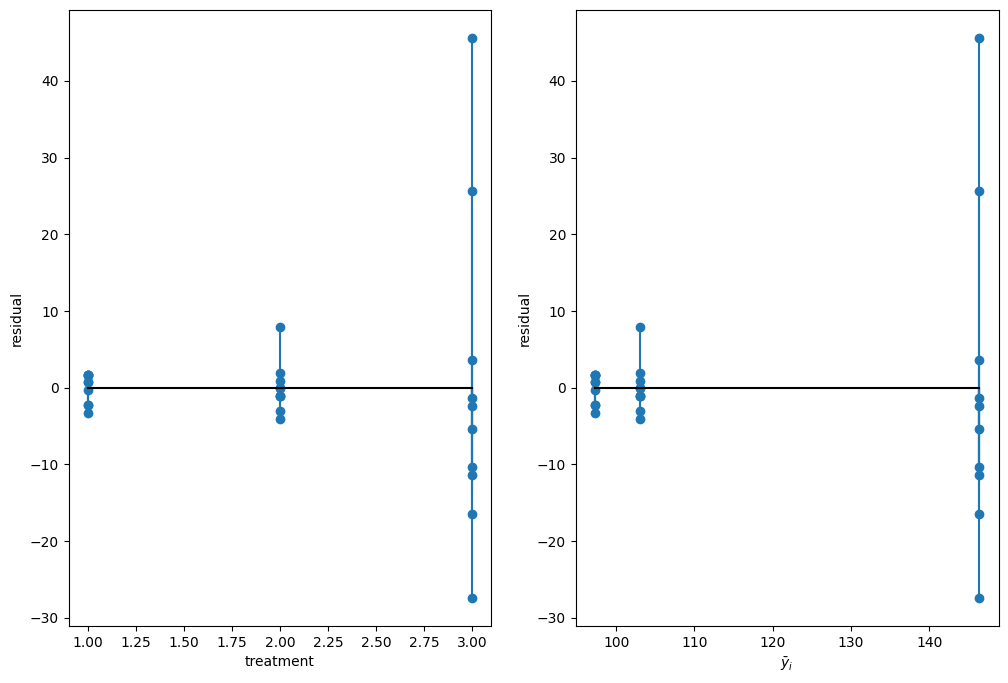

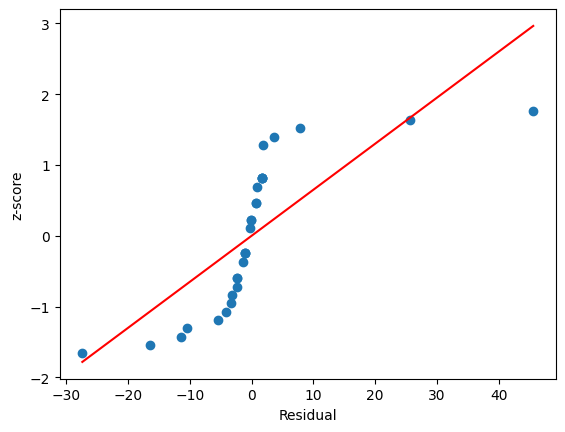

In [10]:
Data_nb.res_plot()
Data_nb.norm_plot()

Uit de residu-plots kan opgemerkt worden dat er waaiervorming is. Dit betekent dat er nog andere afhankelijkheden kunnen zijn en dat verdere analyses noodzakelijk zijn.
Ook is op te merken dat de datapunten de normale verdeling niet volgen.

# ANOVA met blokken

In [20]:
Data_b = Anova_Block("opdrachten.xlsx", 0.01, 10, 3)
df, df_melt, mean_rows, mean_blocks = Data_b.melt("13.55")

In [22]:
df_melt, anova_b, pvalue_b, lsd_b = Data_b.anova()
anova_b

H0 rejected
1-2: no significant difference 
1-3: SIGNIFICANT DIFFERENCE!
2-3: SIGNIFICANT DIFFERENCE!


,sum_sq,df,F,PR(>F)
treatment,14397.800000,2.0,47.484988,6.618891e-08
block,1444.533333,9.0,1.058706,4.356383e-01
Residual,2728.866667,18.0,NaN,NaN


Uit de ANOVA-analyse kan opgemerkt worden de nulhypothese verworpen dient te worden. Dit heeft te maken met de p-waarde die kleiner is dan $\alpha$. Door LSD is er ook te zien dat er significante verschillen bestaan tussen de treatments:

- 1 en 3
- 2 en 3

Dit is allemaal hetzelfde als bij de analyse zonder blokken.

# Residu en normale verdeling

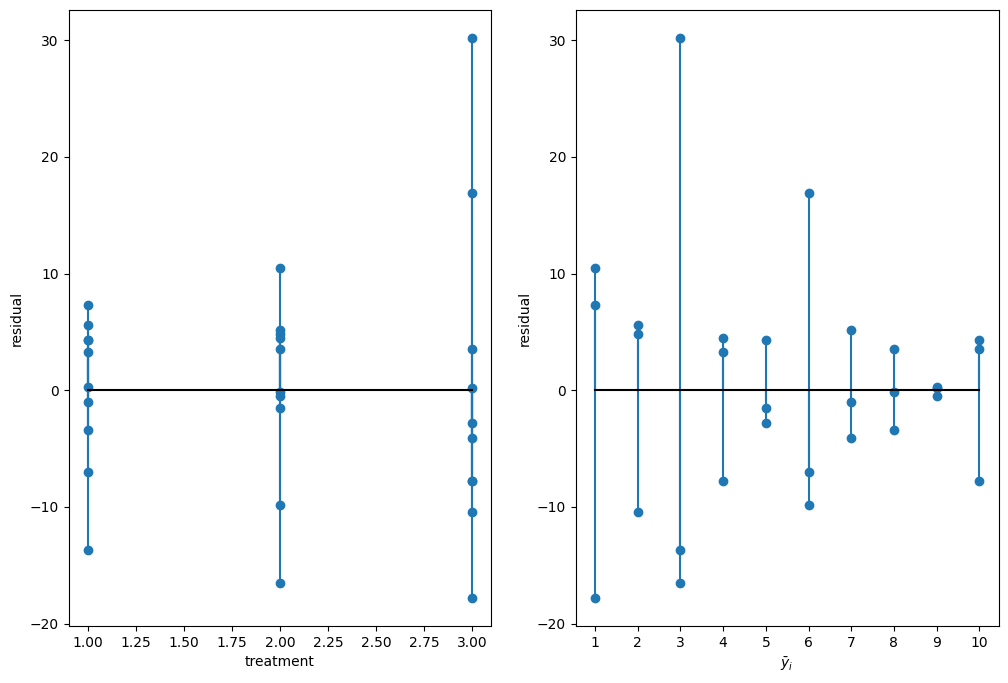

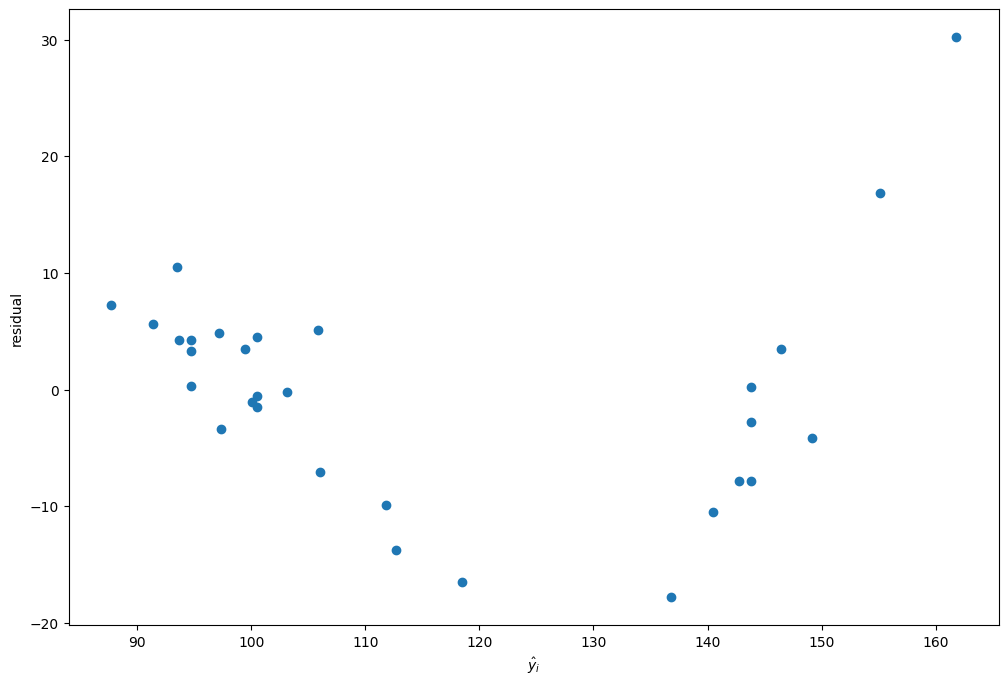

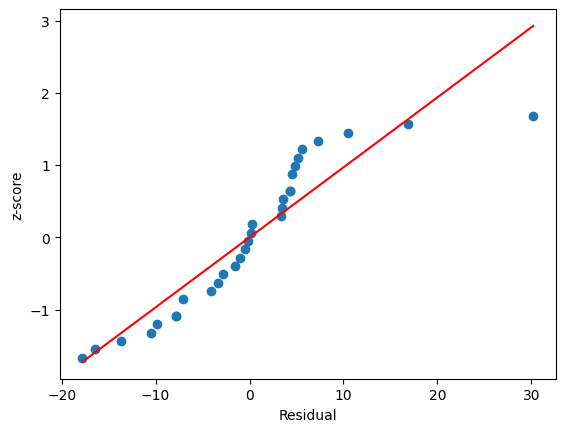

In [23]:
Data_b.res_plot()
Data_b.norm_plot()

Uit de residuplots kan opgemerkt worden dat er een verband is tussen de treatments. Dit is vooral goed te zien wanneer de residu tegen de verwachtingswaarden uitgezet worden. Deze laat een mooie V zien, waardoor het lijkt alsof er een golfvorming aanwezig is. Daarom is het model niet adecuaat, en moeten waarschijnlijk nog meerder afhankelijkheden meegenomen worden in het model.

Ook is in de qq-plot hetzelfde verband te zien als bij de analyse zonder blokken. Hieruit kan geconcludeerd worden dat de meting geen normale verdeling volgt.

# Bepaling van 99%-waarschijnlijkheidsinterval van treatment 3

In [46]:
mean = df[3].mean()
std = df[3].std()

int = stats.t.interval(alpha=0.99, df = len(df[3])-1, loc = mean, scale = std)

In [47]:
int

(77.52529174922846, 215.27470825077154)

Betrouwbaarheidsinterval van $\mu_3$:

$$ 77,53 \leq \mu_3 \leq 215,27$$

# Antwoorden op vragen

## A

Het legeringstype is significant van invloed op de contact resistance

## B

Er blijken significanten verschillen te zijn tussen de treatments:

- 1 en 3
- 2 en 3

Hieruit kan geconcludeerd worden dat treatment 3 significant anders is.

## C

Het betrouwbaarheidsinterval van treatment 3


$$ 77,53 \leq \mu_3 \leq 215,27$$

## D

Uit de residu analyse volgt dat er een beter model moet worden gemaakt. Het gemaakte model is niet adecuaat aangezien er in de residu's waaiervorming is. Dit zou kunnen betekenen dat er een extra afhnakelijkheid een significante invloed heeft op de metingen. Deze is echter niet meegenomen in het model.